In [10]:
import pandas as pd

df = pd.read_csv("cossim_ppmi.csv")
df["layer_i"] = df["latent_i"] // 32768
df["layer_j"] = df["latent_j"] // 32768
df["layers"] = df["layer_i"].astype(str) + "-" + df["layer_j"].astype(str)
df = df.sort_values("layers")

print(df.head())

        latent_i  latent_j  cossim       ppmi  layer_i  layer_j layers
181095     13359     13359     1.0  24.129800        0        0    0-0
199609     21704     21704     1.0  14.847204        0        0    0-0
199608     22371     22371     1.0  14.852334        0        0    0-0
199607     23857     23857     1.0  14.850822        0        0    0-0
199604     17764     17764     1.0  14.854771        0        0    0-0


<Axes: xlabel='cossim', ylabel='ppmi'>

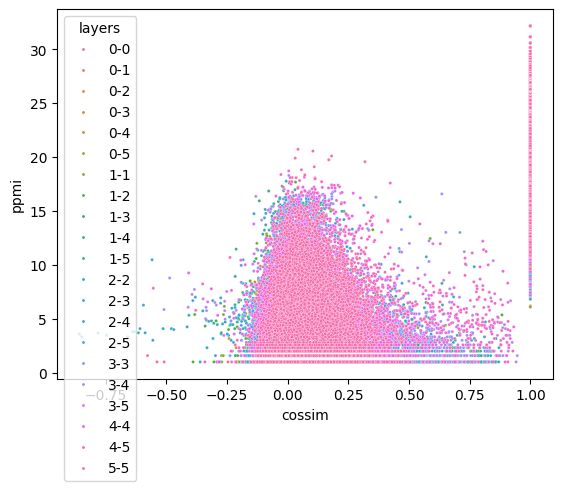

In [30]:
import seaborn as sns

sns.scatterplot(df, x="cossim", y="ppmi", hue="layers", s=5)